## Ejemplo 4: Nltk FreqDist

### 1. Objetivos:
    - Aprender a usar el objeto FreqDist de la librería Nltk
 
---
    
### 2. Desarrollo:

Ahora vamos a explorar el objeto `FreqDist` que nos facilita el conteo de frecuencias de las palabras en nuestro conjunto de datos. La primera parte del procesamiento es idéntico a la vez pasada.

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('../../Datasets/new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [3]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Primero hay que limpiar un poco nuestros textos:

In [4]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

<ipython-input-4-7b19dfa1992e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
<ipython-input-4-7b19dfa1992e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '')
<ipython-input-4-7b19dfa1992e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '')


title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [5]:
# Separamos cada oración en palabras

tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [6]:
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [7]:
all_words = tokenized.sum()

In [8]:
all_words

['detective',
 'lindsay',
 'boxer',
 'and',
 'the',
 'womens',
 'murder',
 'club',
 'race',
 'to',
 'find',
 'a',
 'missing',
 'baby',
 'detective',
 'lindsay',
 'boxer',
 'and',
 'the',
 'womens',
 'murder',
 'club',
 'investigate',
 'a',
 'possible',
 'serial',
 'killer',
 'puppies',
 'and',
 'an',
 'exhusband',
 'loom',
 'large',
 'in',
 'the',
 'last',
 'installment',
 'of',
 'the',
 'cedar',
 'cove',
 'series',
 'in',
 'the',
 'fourth',
 'book',
 'of',
 'the',
 'grail',
 'quest',
 'series',
 'the',
 'english',
 'and',
 'french',
 'face',
 'off',
 'at',
 'the',
 'battle',
 'of',
 'poitiers',
 'in',
 's',
 'tokyo',
 'a',
 'woman',
 'who',
 'punishes',
 'perpetrators',
 'of',
 'domestic',
 'violence',
 'has',
 'ties',
 'to',
 'an',
 'aspiring',
 'novelist',
 'with',
 'an',
 'unusual',
 'project',
 'in',
 'the',
 'young',
 'resent',
 'the',
 'elderly',
 'for',
 'draining',
 'the',
 'weakening',
 'economy',
 'and',
 'a',
 'devastating',
 'earthquake',
 'in',
 'los',
 'angeles',
 'tests

In [10]:
# Utilizamos FreqDist para analizar la distribución de frecuencia 
#de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

freq_dist

FreqDist({'a': 917, 'the': 778, 'of': 417, 'in': 364, 'to': 283, 'and': 280, 'an': 149, 'her': 137, 'is': 127, 'his': 123, ...})

In [11]:
# cuáles son las palabras más comunes

freq_dist.most_common(50) # en este caso las 50 palabras más comunes

[('a', 917),
 ('the', 778),
 ('of', 417),
 ('in', 364),
 ('to', 283),
 ('and', 280),
 ('an', 149),
 ('her', 137),
 ('is', 127),
 ('his', 123),
 ('who', 107),
 ('for', 102),
 ('with', 93),
 ('on', 71),
 ('from', 70),
 ('by', 68),
 ('series', 61),
 ('new', 61),
 ('woman', 60),
 ('that', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('when', 46),
 ('as', 42),
 ('killer', 41),
 ('at', 40),
 ('must', 39),
 ('has', 38),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('she', 31),
 ('about', 30),
 ('their', 29),
 ('are', 28),
 ('war', 27),
 ('after', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('this', 24),
 ('agent', 24),
 ('into', 23),
 ('he', 23)]

Vamos a eliminar las 'palabras vacías' o 'stop words'

Para hacer esto tienes que correr primero el siguiente comando:

`nltk.download('stopwords')`

In [12]:
from nltk.corpus import stopwords

In [13]:
english_stop_words = stopwords.words('english')
english_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# quito las palabras que no aportan significado, i.e. quito las stopwords
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
all_words_except_stop_words

['detective',
 'lindsay',
 'boxer',
 'womens',
 'murder',
 'club',
 'race',
 'find',
 'missing',
 'baby',
 'detective',
 'lindsay',
 'boxer',
 'womens',
 'murder',
 'club',
 'investigate',
 'possible',
 'serial',
 'killer',
 'puppies',
 'exhusband',
 'loom',
 'large',
 'last',
 'installment',
 'cedar',
 'cove',
 'series',
 'fourth',
 'book',
 'grail',
 'quest',
 'series',
 'english',
 'french',
 'face',
 'battle',
 'poitiers',
 'tokyo',
 'woman',
 'punishes',
 'perpetrators',
 'domestic',
 'violence',
 'ties',
 'aspiring',
 'novelist',
 'unusual',
 'project',
 'young',
 'resent',
 'elderly',
 'draining',
 'weakening',
 'economy',
 'devastating',
 'earthquake',
 'los',
 'angeles',
 'tests',
 'administration',
 'countrys',
 'first',
 'jewish',
 'president',
 'temperance',
 'brennan',
 'accused',
 'mishandling',
 'autopsy',
 'pregnant',
 'woman',
 'shows',
 'cedar',
 'cove',
 'christmas',
 'eve',
 'goes',
 'labor',
 'room',
 'stable',
 'young',
 'womans',
 'life',
 'transformed',
 'mounta

In [15]:
# Vamos a volver a contar la frecuencia de las palabras
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)
freq_dist_no_stop_words

FreqDist({'series': 61, 'new': 61, 'woman': 60, 'book': 57, 'detective': 52, 'murder': 51, 'novel': 49, 'killer': 41, 'must': 39, 'investigates': 38, ...})

In [16]:
# de nuevo las 50 más comunes
freq_dist_no_stop_words.most_common(50)

[('series', 61),
 ('new', 61),
 ('woman', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('killer', 41),
 ('must', 39),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('war', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('agent', 24),
 ('cia', 22),
 ('love', 22),
 ('secret', 21),
 ('discovers', 21),
 ('lawyer', 20),
 ('murdered', 20),
 ('finds', 20),
 ('eve', 19),
 ('th', 19),
 ('mother', 19),
 ('case', 19),
 ('women', 19),
 ('wife', 19),
 ('serial', 18),
 ('first', 18),
 ('secrets', 18),
 ('pursues', 18),
 ('investigator', 18),
 ('operative', 18),
 ('missing', 17),
 ('search', 17),
 ('searches', 17),
 ('help', 17),
 ('fbi', 17),
 ('stone', 17),
 ('years', 17),
 ('girl', 17),
 ('investigate', 16),
 ('one', 16)]

In [17]:
# Conteo de una palabra y porcentaje de aparición
# por ejemplo, la palabra "woman"

print(f'{(100 * freq_dist_no_stop_words["woman"] / len(all_words_except_stop_words)):.3f}%')

0.786%


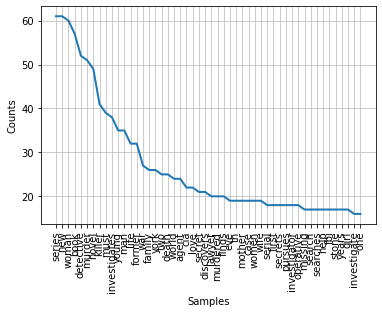

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# Veamos qué proporción del texto está siendo ocupada por las 50 palabras más comunes
# se ocupa la función plot

freq_dist_no_stop_words.plot(50)

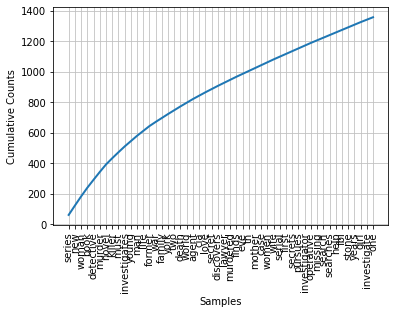

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [21]:
# o bien el acumulado
freq_dist_no_stop_words.plot(50, cumulative=True)

In [22]:
# Palabras que sólo aparecen una sola vez
# En el argot de NLP, se conocen como hapaxes

freq_dist_no_stop_words.hapaxes()[:20]

['puppies',
 'loom',
 'last',
 'grail',
 'poitiers',
 'tokyo',
 'punishes',
 'domestic',
 'aspiring',
 'resent',
 'draining',
 'weakening',
 'economy',
 'earthquake',
 'tests',
 'countrys',
 'jewish',
 'mishandling',
 'pregnant',
 'shows']

In [23]:
# Palabras largas

unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series

0             rivera
1         revelation
2       rehabilitate
3            project
4           paradise
            ...     
3060          dreams
3061           blood
3062          modest
3063            adam
3064          wounds
Length: 3065, dtype: object

In [24]:
unique_series[unique_series.str.len() > 15]

716     turnofthethcentury
869       counterterrorism
899      suicidebyaccident
1528     multigenerational
1698      postthanksgiving
1864      mountainclimbing
1945      publicityseeking
1983      singersongwriter
2069      autobiographical
2893      dissatisfactions
dtype: object

In [25]:
# Palabras largas que son frecuentes

larger_than_10 = unique_series.str.len() > 10
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 10)

unique_series[larger_than_10 & is_frequent]

879     investigates
1792     investigate
1820    investigator
dtype: object

In [26]:
# Podemos contar otras cosas, como la frecuencia de longitudes de nuestras palabras

freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])
freq_dist_lengths

FreqDist({5: 1382, 6: 1364, 7: 1212, 4: 1051, 8: 707, 9: 586, 3: 471, 10: 354, 11: 164, 12: 157, ...})

In [28]:
# las longitudes de las palabras más comunes
freq_dist_lengths.most_common()

[(5, 1382),
 (6, 1364),
 (7, 1212),
 (4, 1051),
 (8, 707),
 (9, 586),
 (3, 471),
 (10, 354),
 (11, 164),
 (12, 157),
 (2, 60),
 (13, 60),
 (14, 30),
 (16, 11),
 (15, 11),
 (1, 8),
 (17, 2),
 (18, 1)]

In [29]:
freq_dist_lengths.max() #la que tiene más palabras de la longitud más popular

5

In [22]:
freq_dist_lengths[5]

1382

In [23]:
# También podemos saber qué proporción del total de palabras tiene longitud de 5

freq_dist_lengths.freq(5)

0.18110339405058315